# import and redefine some constant variables

In [22]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import requests

# Define a list of colormaps
colormaps = [
    'viridis', 'plasma', 'inferno', 'magma', 'cividis',
    'gray', 'jet', 'rainbow', 'cool', 'hot', 'nipy_spectral',
    'autumn', 'coolwarm', 'copper'
]

# Define a list of interpolation methods
interpolations = ['antialiased', 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming',
                  'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos',
                  'blackman']

# Create subplots for each colormap
plt.figure(figsize=(60, 60))
num_cols = 4
num_rows = int(np.ceil(len(colormaps) / num_cols))

<Figure size 6000x6000 with 0 Axes>

In [23]:
API_URL = "https://iqf1uezcub.execute-api.us-east-1.amazonaws.com/stage/run_a1_shadow_analysis"
# API_URL = "http://localhost:56789/run_a1_shadow_analysis"

# send api resquest and get response

In [24]:
# Send a GET request
response = requests.get(API_URL)
ShadowMatrix_DataFrame = None
TimeStamp = None
VisualizedImages = None

# Check the response status code
if response.status_code == 200:
    print("Request was successful!")
    json_data = response.json()
    print('Message: ', json_data["Message"])
    TimeStamp = json_data["Timestamp"]
    print('UTC Timestamp: ', TimeStamp)
    ShadowMatrix = json.loads(json_data['ShadowMatrix'])
    ShadowMatrix_DataFrame = pd.DataFrame(ShadowMatrix)
    print('ShadowMatrix_DataFrame: ', ShadowMatrix_DataFrame.shape)
    VisualizedImages = json_data['VisualizedImages']
else:
    print(f"Request failed with status code: {response.status_code}")

Request failed with status code: 503


In [25]:
VisualizedImages

# visualization

TypeError: Image data of dtype object cannot be converted to float

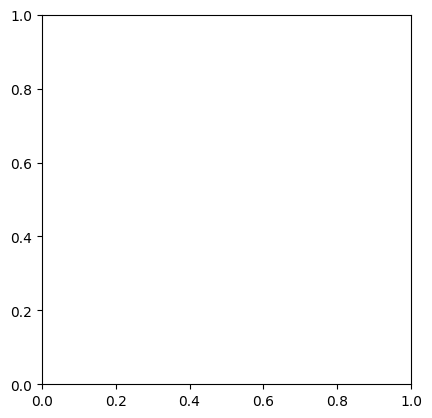

In [26]:
plt.imshow(ShadowMatrix_DataFrame, cmap='viridis', interpolation='nearest')
plt.colorbar() # Add color bar for reference
plt.axis("off")
plt.title("Shadow Matrix Visualization \nTime (CT): " + TimeStamp)
plt.show()

TypeError: Image data of dtype object cannot be converted to float

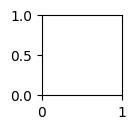

In [27]:
# Effectively visualize them use many colormaps and interpolations
for i, cmap in enumerate(colormaps):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(ShadowMatrix_DataFrame, interpolation=random.choice(interpolations), cmap=cmap)
    plt.axis('off')

plt.tight_layout()
plt.show()